In [821]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [822]:
# load data
train_data = pd.read_csv(r"./data/train.csv")
test_data = pd.read_csv(r"./data/test.csv")

In [823]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [824]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


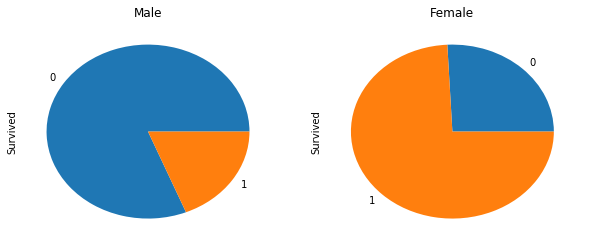

In [825]:
# Basic plot
fig = plt.figure(figsize=(10,4))
fig.add_subplot(121)
train_data.Survived[train_data['Sex'] == 'male'].value_counts(sort=False).plot(kind='pie')
plt.title('Male')
fig.add_subplot(122)
train_data.Survived[train_data['Sex'] == 'female'].value_counts(sort=False).plot(kind='pie')
plt.title('Female')

In [826]:
train_data['Surname'] = train_data.apply(lambda row: row.Name.split(',')[0], axis = 1)
test_data['Surname'] = test_data.apply(lambda row: row.Name.split(',')[0], axis = 1)
train_data['Title'] = train_data.apply(lambda row: row.Name.split(',')[1].split('.')[0], axis = 1)
test_data['Title'] = test_data.apply(lambda row: row.Name.split(',')[1].split('.')[0], axis = 1)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr


In [827]:
# Extract Titles to be used to get a more accurate median

train_titles = train_data.Title.unique()
test_titles = test_data.Title.unique()
titles = np.unique(np.concatenate((test_titles, train_titles), axis = 0))
print(titles)

[' Capt' ' Col' ' Don' ' Dona' ' Dr' ' Jonkheer' ' Lady' ' Major' ' Master'
 ' Miss' ' Mlle' ' Mme' ' Mr' ' Mrs' ' Ms' ' Rev' ' Sir' ' the Countess']


In [828]:
def age_with_median(data, titles, medians):
    data['Age'].fillna(-1, inplace=True)

    if medians == None:
        medians = dict()
        for title in titles:
            median = data.Age[(data["Age"] != -1) & (data['Title'] == title)].median()
            medians[title] = median
    
    for index, row in data.iterrows():
        if row['Age'] == -1:
            data.loc[index, 'Age'] = medians[row['Title']]
            
    return medians

train_medians = age_with_median(train_data, titles, None)

print(train_medians)

age_with_median(test_data, titles, train_medians)
            
train_data.head()

{' Capt': 70.0, ' Col': 58.0, ' Don': 40.0, ' Dona': nan, ' Dr': 46.5, ' Jonkheer': 38.0, ' Lady': 48.0, ' Major': 48.5, ' Master': 3.5, ' Miss': 21.0, ' Mlle': 24.0, ' Mme': 24.0, ' Mr': 30.0, ' Mrs': 35.0, ' Ms': 28.0, ' Rev': 46.5, ' Sir': 49.0, ' the Countess': 33.0}


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr


In [829]:
# Pad numbers
from sklearn.preprocessing import Imputer

def nan_padding(data, columns):
    for column in columns:
        imputer=Imputer()
        data[column]=imputer.fit_transform(data[column].values.reshape(-1,1))
    return data

nan_columns = ["Age", "Fare", "SibSp", "Parch"]

train_data = nan_padding(train_data, nan_columns)
test_data = nan_padding(test_data, nan_columns)

In [830]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S,Allen,Mr


In [831]:
#save PassengerId for evaluation
test_passenger_id=test_data["PassengerId"]

In [832]:
def drop_not_concerned(data, columns):
    return data.drop(columns, axis=1)

not_concerned_columns = ["PassengerId","Name", "Fare", "Ticket", "Cabin", "Embarked", "Title"]
train_data = drop_not_concerned(train_data, not_concerned_columns)
test_data = drop_not_concerned(test_data, not_concerned_columns)

In [833]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Surname
0,0,3,male,22.0,1.0,0.0,Braund
1,1,1,female,38.0,1.0,0.0,Cumings
2,1,3,female,26.0,0.0,0.0,Heikkinen
3,1,1,female,35.0,1.0,0.0,Futrelle
4,0,3,male,35.0,0.0,0.0,Allen


In [834]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Surname
0,3,male,34.5,0.0,0.0,Kelly
1,3,female,47.0,1.0,0.0,Wilkes
2,2,male,62.0,0.0,0.0,Myles
3,3,male,27.0,0.0,0.0,Wirz
4,3,female,22.0,1.0,1.0,Hirvonen


In [835]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data


dummy_columns = ["Pclass", "Surname"]
train_data=dummy_data(train_data, dummy_columns)
test_data=dummy_data(test_data, dummy_columns)

In [836]:
test_data.head()

,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Surname_Abbott,Surname_Abelseth,Surname_Abrahamsson,...,Surname_Williams,Surname_Wilson,Surname_Wirz,Surname_Wittevrongel,Surname_Wright,Surname_Zakarian,Surname_de Brito,Surname_de Messemaeker,Surname_del Carlo,Surname_van Billiard
0,male,34.5,0.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,female,47.0,1.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,male,62.0,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,male,27.0,0.0,0.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,female,22.0,1.0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [837]:
from sklearn.preprocessing import LabelEncoder
def sex_to_int(data):
    le = LabelEncoder()
    le.fit(["male","female"])
    data["Sex"]=le.transform(data["Sex"]) 
    return data

train_data = sex_to_int(train_data)
test_data = sex_to_int(test_data)
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Surname_Abbing,Surname_Abbott,...,Surname_Yousseff,Surname_Yrois,Surname_Zabour,Surname_Zimmerman,Surname_de Messemaeker,Surname_de Mulder,Surname_de Pelsmaeker,Surname_del Carlo,Surname_van Billiard,Surname_van Melkebeke
0,0,1,22.0,1.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,38.0,1.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,26.0,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,35.0,1.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,35.0,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [838]:
from sklearn.preprocessing import LabelBinarizer
data_y = train_data["Survived"]
lb = LabelBinarizer()
data_y = lb.fit_transform(data_y)

In [839]:
from sklearn.preprocessing import MinMaxScaler

def normalize_age(data):
    scaler = MinMaxScaler()
    data["Age"] = scaler.fit_transform(data["Age"].values.reshape(-1,1))
    return data

train_data = normalize_age(train_data)
test_data = normalize_age(test_data)
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Surname_Abbing,Surname_Abbott,...,Surname_Yousseff,Surname_Yrois,Surname_Zabour,Surname_Zimmerman,Surname_de Messemaeker,Surname_de Mulder,Surname_de Pelsmaeker,Surname_del Carlo,Surname_van Billiard,Surname_van Melkebeke
0,0,1,0.271174,1.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0.472229,1.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0.321438,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0.434531,1.0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0.434531,0.0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [840]:
data_x = train_data.drop(["Survived"], axis=1)

In [841]:
def add_missing_dummy_columns( data, columns ):
    missing_cols = set( columns ) - set( data.columns )
    for c in missing_cols:
        data[c] = 0

In [842]:
def fix_columns( data, columns ):  

    add_missing_dummy_columns( data, columns )

    # make sure we have all the columns we need
    assert( set( columns ) - set( data.columns ) == set())

    extra_cols = set( data.columns ) - set( columns )
    if extra_cols:
        print("extra columns:", extra_cols)

    data = data[ columns ]
    return data

In [843]:
test_data = fix_columns(test_data, list(data_x))

extra columns: {'Surname_Andersen', 'Surname_Gilbert', 'Surname_Barry', 'Surname_Makinen', 'Surname_Brobeck', 'Surname_Khalil', 'Surname_Ismay', 'Surname_Willer', 'Surname_Hellstrom', 'Surname_Larsson-Rondberg', 'Surname_Beattie', 'Surname_Oxenham', 'Surname_Mangiavacchi', 'Surname_Franklin', 'Surname_Roth', 'Surname_Drapkin', 'Surname_Dika', 'Surname_Abelseth', 'Surname_Katavelas', 'Surname_Mardirosian', 'Surname_Assaf', 'Surname_Cotterill', 'Surname_Spector', 'Surname_Dibden', 'Surname_Salomon', 'Surname_Fillbrook', 'Surname_Schabert', 'Surname_Baimbrigge', 'Surname_Wilson', 'Surname_Linehan', 'Surname_Daher', 'Surname_Evans', 'Surname_Mahon', 'Surname_Matinoff', 'Surname_Ware', 'Surname_Maguire', 'Surname_Keeping', 'Surname_de Brito', 'Surname_Nasr', 'Surname_Lyntakoff', 'Surname_Whabee', 'Surname_Niklasson', 'Surname_Flegenheim', 'Surname_Henriksson', 'Surname_Dintcheff', 'Surname_Delalic', 'Surname_Tenglin', 'Surname_Dulles', 'Surname_Jefferys', 'Surname_Duquemin', 'Surname_Hillia

In [844]:
train_data = fix_columns(data_x, list(test_data))

In [845]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

print("train_x:{}".format(X_train.shape))
print("train_y:{}".format(y_train.shape))
print("train_y content:{}".format(y_train[:3]))

print("valid_x:{}".format(X_valid.shape))
print("valid_y:{}".format(y_valid.shape))
print("test_x:{}".format(test_data.shape))

train_x:(712, 674)
train_y:(712, 1)
train_y content:[[0]
 [0]
 [0]]
valid_x:(179, 674)
valid_y:(179, 1)
test_x:(418, 674)


In [846]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
clf1 = LinearSVC(random_state=41)
clf2 = SGDClassifier(random_state=13)
clf3 = KNeighborsClassifier(n_neighbors=5)
clf4 = RandomForestClassifier(n_estimators = 100)
clf5 = GaussianNB()
clf6 = MLPClassifier()

eclf1 = VotingClassifier(estimators= \
                         [('lsvc', clf1),\
                          ('sgdc', clf2),\
                          ('knn', clf3),\
                          ('rf', clf4),\
                          ('gnb',clf5)])
#eclf1 = VotingClassifier(estimators= \
#                         [('lsvc', clf1),\
#                          ('sgdc', clf2),\
#                          ('knn', clf3),\
#                          ('rf', clf4),\ 
#                          ('gnb',clf5))
eclf1.fit(X_train, y_train.ravel())

VotingClassifier(estimators=[('lsvc', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=41, tol=0.0001,
     verbose=0)), ('sgdc', SGDClassifier(alpha=0.0001, average=False, class_weight...lse, random_state=None,
            verbose=0, warm_start=False)), ('gnb', GaussianNB(priors=None))],
         n_jobs=1, voting='hard', weights=None)

In [847]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


# Take a poll of some classifiers
y_valid_pred = eclf1.predict(X_valid)

score_f1 = f1_score(y_valid_pred, y_valid.ravel())
print("F1 Accuracy: {0:.2f}%".format(score_f1 * 100.0))
score = eclf1.score(X_valid, y_valid)
print("Test Accuracy: {0:.2f}%".format(score * 100.0))
confusion_matrix(y_valid, y_valid_pred)

F1 Accuracy: 82.52%
Test Accuracy: 86.03%


array([[95, 10],
       [15, 59]])

In [848]:
test_data.head()

,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Surname_Abbing,Surname_Abbott,Surname_Abelson,...,Surname_Yousseff,Surname_Yrois,Surname_Zabour,Surname_Zimmerman,Surname_de Messemaeker,Surname_de Mulder,Surname_de Pelsmaeker,Surname_del Carlo,Surname_van Billiard,Surname_van Melkebeke
0,1,0.452723,0.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.617566,1.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.815377,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.353818,0.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.287881,1.0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [849]:
predictions = eclf1.predict(test_data)

final_results = pd.DataFrame(np.array(list(zip(test_passenger_id,predictions))), columns=["PassengerId", "Survived"])
final_results.to_csv(r"data\predictions.csv", index=False)